<a href="https://colab.research.google.com/github/rodwol/PCA/blob/main/PCA_Formative_1%5BPeer_Group7%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)

*   List item
*   List item


This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

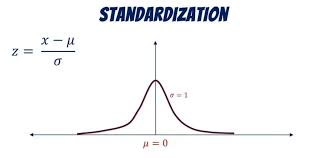


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/rodwol/PCA/main/owid-covid-latest.csv'
data = pd.read_csv(url)

numeric_data = data.select_dtypes(include=['number'])
numeric_data = numeric_data.dropna(axis=1, how='any')
numeric_data = numeric_data.fillna(numeric_data.mean())
numeric_data = numeric_data.loc[:, numeric_data.std() > 0]

scaler = StandardScaler()
standardized = scaler.fit_transform(numeric_data)

print(numeric_data.head())

print("Shape of numeric data:", numeric_data.shape)
print("Any NaNs left?", numeric_data.isna().sum().sum() > 0)

     population
0  4.112877e+07
1  1.426737e+09
2  2.842318e+06
3  4.490323e+07
4  4.429500e+04
Shape of numeric data: (247, 1)
Any NaNs left? False


In [3]:
def standardize_data(data):
    data = data.select_dtypes(include=[np.number])
    data = data.dropna(axis=1, how='all')
    data = data.fillna(data.mean())
    std = data.std()
    data = data.loc[:, std > 0]

    mean = data.mean()
    std = data.std()

    standardized_data = (data - mean) / std
    return standardized_data

standardized = standardize_data(data)
print("Any NaNs in standardized?", np.isnan(standardized).any())
print("Any Infs in standardized?", np.isinf(standardized).any())
print("Standardized shape:", standardized.shape)

Any NaNs in standardized? total_cases                              False
new_cases                                False
new_cases_smoothed                       False
total_deaths                             False
new_deaths                               False
new_deaths_smoothed                      False
total_cases_per_million                  False
new_cases_per_million                    False
new_cases_smoothed_per_million           False
total_deaths_per_million                 False
new_deaths_per_million                   False
new_deaths_smoothed_per_million          False
icu_patients                             False
icu_patients_per_million                 False
hosp_patients                            False
hosp_patients_per_million                False
weekly_icu_admissions                    False
weekly_icu_admissions_per_million        False
weekly_hosp_admissions                   False
weekly_hosp_admissions_per_million       False
total_vaccinations                

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [4]:
# Step 3: Calculate the Covariance Matrix
def compute_covariance_matrix(X_std):
    X_std = X_std.to_numpy()  # Ensure it's a NumPy array
    n_samples = X_std.shape[0]
    cov_matrix = (X_std.T @ X_std) / (n_samples - 1)  # Use n - 1
    return cov_matrix

cov_matrix = compute_covariance_matrix(standardized)

# Sanity checks
print("Covariance matrix shape:", cov_matrix.shape)
print("Any NaNs?", np.isnan(cov_matrix).any())
print("Any infs?", np.isinf(cov_matrix).any())
print(cov_matrix.round(2))

Covariance matrix shape: (47, 47)
Any NaNs? False
Any infs? False
[[ 1.    0.88  0.88 ...  0.03  0.05  0.87]
 [ 0.88  1.    1.   ...  0.03  0.05  0.63]
 [ 0.88  1.    1.   ...  0.03  0.05  0.63]
 ...
 [ 0.03  0.03  0.03 ...  1.    0.82 -0.01]
 [ 0.05  0.05  0.05 ...  0.82  1.    0.  ]
 [ 0.87  0.63  0.63 ... -0.01  0.    1.  ]]


### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [5]:
# Step 4: Perform Eigendecomposition
import numpy as np
# Ensure the previous cell (Step 3) calculating cov_matrix has been executed
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nFirst 5 eigenvalues:", eigenvalues[:5])
print("\nSum of eigenvalues:", np.sum(eigenvalues))

# Display eigenvalues and eigenvectors
print("\nAll eigenvalues:")
print(eigenvalues)
print("\nFirst eigenvector (first column):")
print(eigenvectors[:, 0])

Eigenvalues shape: (47,)
Eigenvectors shape: (47, 47)

First 5 eigenvalues: [9.22890836+0.j 7.69685112+0.j 5.32604496+0.j 3.99174044+0.j
 3.13842357+0.j]

Sum of eigenvalues: (47.00000000000002+0j)

All eigenvalues:
[ 9.22890836e+00+0.00000000e+00j  7.69685112e+00+0.00000000e+00j
  5.32604496e+00+0.00000000e+00j  3.99174044e+00+0.00000000e+00j
  3.13842357e+00+0.00000000e+00j  2.38416415e+00+0.00000000e+00j
  2.13536802e+00+0.00000000e+00j  1.72637092e+00+0.00000000e+00j
  1.62342591e+00+0.00000000e+00j  1.36446027e+00+0.00000000e+00j
  1.14333266e+00+0.00000000e+00j  9.73723604e-01+0.00000000e+00j
  8.92328275e-01+0.00000000e+00j  8.00483083e-01+0.00000000e+00j
  6.26046588e-01+0.00000000e+00j  5.73028009e-01+0.00000000e+00j
  4.62475720e-01+0.00000000e+00j  4.53021496e-01+0.00000000e+00j
  4.10765898e-01+0.00000000e+00j  3.87096786e-01+0.00000000e+00j
  3.34731586e-01+0.00000000e+00j  3.46557800e-01+0.00000000e+00j
  2.05114316e-01+0.00000000e+00j  1.89513449e-01+0.00000000e+00j
  1.

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [6]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
sorted_eigenvectors

array([[-3.01692683e-01+0.00000000e+00j, -3.95173118e-02+0.00000000e+00j,
        -9.59569509e-02+0.00000000e+00j, ...,
        -2.79719866e-11-6.91242779e-11j, -2.79719866e-11+6.91242779e-11j,
        -7.88678283e-11+0.00000000e+00j],
       [-2.47139440e-01+0.00000000e+00j, -5.76840045e-02+0.00000000e+00j,
        -7.00993763e-02+0.00000000e+00j, ...,
        -1.73959386e-04-2.61534292e-04j, -1.73959386e-04+2.61534292e-04j,
        -4.03171952e-04+0.00000000e+00j],
       [-2.47139443e-01+0.00000000e+00j, -5.76840126e-02+0.00000000e+00j,
        -7.00993647e-02+0.00000000e+00j, ...,
         1.73959396e-04+2.61534308e-04j,  1.73959396e-04-2.61534308e-04j,
         4.03171968e-04+0.00000000e+00j],
       ...,
       [ 2.07496317e-02+0.00000000e+00j, -2.88941679e-01+0.00000000e+00j,
        -3.17913927e-02+0.00000000e+00j, ...,
        -2.49636994e-12-3.89332571e-12j, -2.49636994e-12+3.89332571e-12j,
        -6.84953739e-12+0.00000000e+00j],
       [ 2.11732330e-02+0.00000000e+00j, -3.

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
num_components = None  # Decide on the number of principal components to keep
reduced_data = None  # Project data onto the principal components
reduced_data[:5]

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

In [ ]:
# Step 8: Visualize Before and After PCA


# Plot original data (first two features for simplicity)


# Plot reduced data after PCA
